# VINUSHREE NAGRAJ
# ALY6040
# MIDTERM
# GRADIENT BOOST CLASSIFIER  ON CANCELLED FLIGHTS

In [ ]:
import numpy as np
import random
import pandas as pd
import os
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from pylab import rcParams
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

rcParams['figure.figsize'] = (23, 8)
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#retrive data
from google.colab import files
uploaded = files.upload()

Saving flights_exam.csv to flights_exam.csv


In [ ]:
flights = pd.read_csv('flights_exam.csv')
flights

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,676,2015,1,1,4,AA,1562,N475AA,RIC,DFW,640,636.0,-4.0,17.0,653.0,220.0,217.0,188.0,1158,901.0,12.0,920,913.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN
1,3720,2015,1,1,4,AA,1528,N475AA,DFW,LAS,1025,1047.0,22.0,13.0,1100.0,180.0,171.0,151.0,1055,1131.0,7.0,1125,1138.0,13.0,0,0,NaN,NaN,NaN,NaN,NaN
2,3795,2015,1,1,4,AA,1002,N475AA,DFW,IAH,1030,NaN,NaN,NaN,NaN,65.0,NaN,NaN,224,NaN,NaN,1135,NaN,NaN,0,1,NaN,NaN,NaN,NaN,NaN
3,5375,2015,1,1,4,AA,1528,N475AA,LAS,DFW,1210,1222.0,12.0,23.0,1245.0,160.0,165.0,132.0,1055,1657.0,10.0,1650,1707.0,17.0,0,0,5.0,0.0,4.0,8.0,0.0
4,10516,2015,1,1,4,AA,1308,N475AA,DFW,MCO,1740,1817.0,37.0,26.0,1843.0,145.0,155.0,123.0,985,2146.0,6.0,2105,2152.0,47.0,0,0,10.0,0.0,25.0,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,5800014,2015,12,30,3,AA,1052,N475AA,RDU,DFW,1545,1617.0,32.0,11.0,1628.0,198.0,179.0,156.0,1061,1804.0,12.0,1803,1816.0,13.0,0,0,NaN,NaN,NaN,NaN,NaN
1556,5803305,2015,12,30,3,AA,2568,N475AA,DFW,ABQ,1910,1927.0,17.0,10.0,1937.0,112.0,102.0,88.0,569,2005.0,4.0,2002,2009.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN
1557,5808367,2015,12,31,4,AA,1282,N475AA,ABQ,DFW,800,800.0,0.0,21.0,821.0,104.0,101.0,71.0,569,1032.0,9.0,1044,1041.0,-3.0,0,0,NaN,NaN,NaN,NaN,NaN
1558,5811919,2015,12,31,4,AA,1373,N475AA,DFW,JAX,1155,1208.0,13.0,11.0,1219.0,139.0,122.0,107.0,918,1506.0,4.0,1514,1510.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1560 non-null   int64  
 1   YEAR                 1560 non-null   int64  
 2   MONTH                1560 non-null   int64  
 3   DAY                  1560 non-null   int64  
 4   DAY_OF_WEEK          1560 non-null   int64  
 5   AIRLINE              1560 non-null   object 
 6   FLIGHT_NUMBER        1560 non-null   int64  
 7   TAIL_NUMBER          1560 non-null   object 
 8   ORIGIN_AIRPORT       1560 non-null   object 
 9   DESTINATION_AIRPORT  1560 non-null   object 
 10  SCHEDULED_DEPARTURE  1560 non-null   int64  
 11  DEPARTURE_TIME       1520 non-null   float64
 12  DEPARTURE_DELAY      1520 non-null   float64
 13  TAXI_OUT             1520 non-null   float64
 14  WHEELS_OFF           1520 non-null   float64
 15  SCHEDULED_TIME       1560 non-null   f

In [ ]:
flights.head()

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,676,2015,1,1,4,AA,1562,N475AA,RIC,DFW,640,636.0,-4.0,17.0,653.0,220.0,217.0,188.0,1158,901.0,12.0,920,913.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN
1,3720,2015,1,1,4,AA,1528,N475AA,DFW,LAS,1025,1047.0,22.0,13.0,1100.0,180.0,171.0,151.0,1055,1131.0,7.0,1125,1138.0,13.0,0,0,NaN,NaN,NaN,NaN,NaN
2,3795,2015,1,1,4,AA,1002,N475AA,DFW,IAH,1030,NaN,NaN,NaN,NaN,65.0,NaN,NaN,224,NaN,NaN,1135,NaN,NaN,0,1,NaN,NaN,NaN,NaN,NaN
3,5375,2015,1,1,4,AA,1528,N475AA,LAS,DFW,1210,1222.0,12.0,23.0,1245.0,160.0,165.0,132.0,1055,1657.0,10.0,1650,1707.0,17.0,0,0,5.0,0.0,4.0,8.0,0.0
4,10516,2015,1,1,4,AA,1308,N475AA,DFW,MCO,1740,1817.0,37.0,26.0,1843.0,145.0,155.0,123.0,985,2146.0,6.0,2105,2152.0,47.0,0,0,10.0,0.0,25.0,12.0,0.0


In [ ]:
variables_to_remove = ['Unnamed: 0','TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'YEAR',
                       'DAY','AIR_SYSTEM_DELAY',
                       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY','AIRLINE','ORIGIN_AIRPORT',
                        'TAIL_NUMBER', 'AIR_TIME','DEPARTURE_TIME','ELAPSED_TIME','DEPARTURE_DELAY','SCHEDULED_ARRIVAL','ARRIVAL_TIME',	'ARRIVAL_DELAY','DIVERTED']
flights.drop(variables_to_remove, axis = 1, inplace = True)


In [ ]:
missing_df = flights.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(flights.shape[0]-missing_df['missing values'])/flights.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,MONTH,0,100.0
1,DAY_OF_WEEK,0,100.0
2,FLIGHT_NUMBER,0,100.0
3,DESTINATION_AIRPORT,0,100.0
4,SCHEDULED_DEPARTURE,0,100.0
5,SCHEDULED_TIME,0,100.0
6,DISTANCE,0,100.0
7,CANCELLED,0,100.0


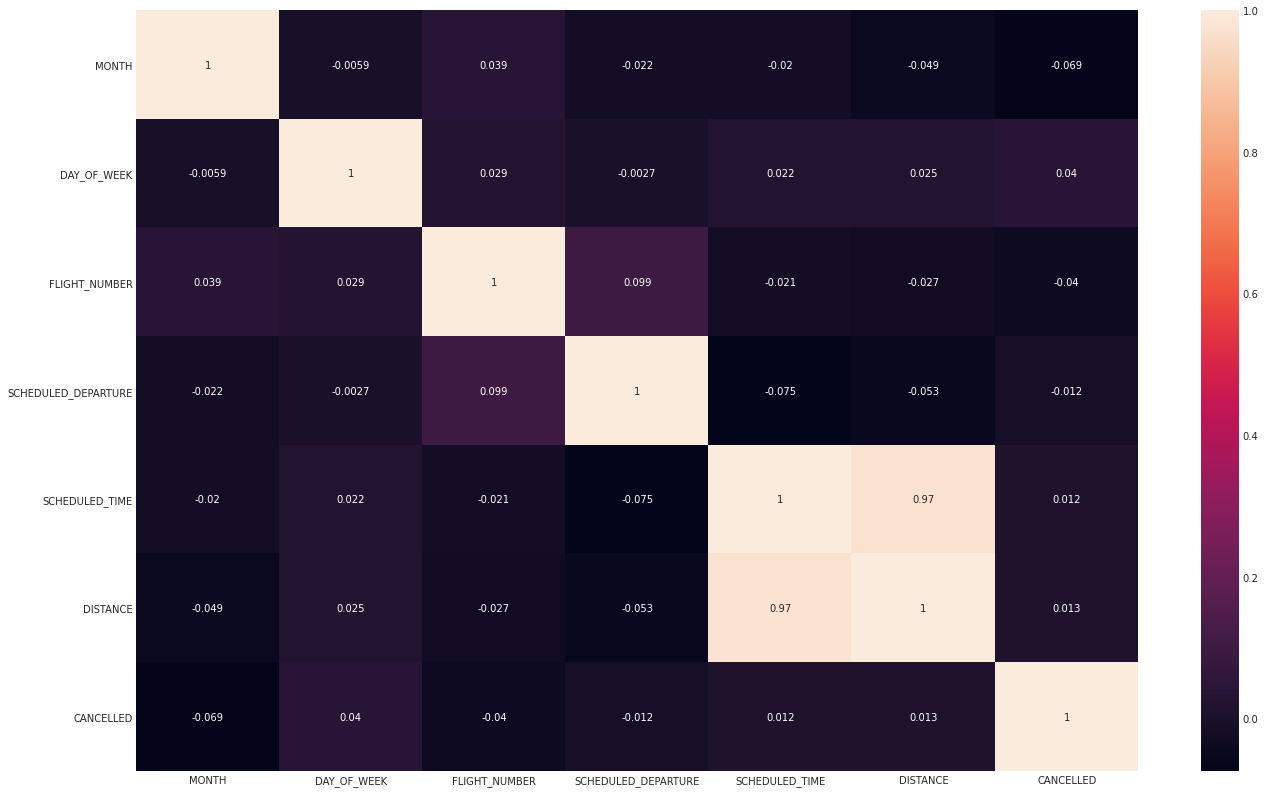

In [ ]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(flights.corr(),annot = True)
plt.show()

In [ ]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MONTH                1560 non-null   int64  
 1   DAY_OF_WEEK          1560 non-null   int64  
 2   FLIGHT_NUMBER        1560 non-null   int64  
 3   DESTINATION_AIRPORT  1560 non-null   object 
 4   SCHEDULED_DEPARTURE  1560 non-null   int64  
 5   SCHEDULED_TIME       1560 non-null   float64
 6   DISTANCE             1560 non-null   int64  
 7   CANCELLED            1560 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 97.6+ KB


In [ ]:
#integer mapping using LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(flights['DESTINATION_AIRPORT'])
print(integer_encoded)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

[41 53 49 ... 41 52 41]


In [ ]:
flights['DESTINATION_AIRPORT'] = integer_encoded

In [ ]:
X = flights.drop('CANCELLED',axis = 1)
X.shape

(1560, 7)

In [ ]:
y = flights['CANCELLED']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: CANCELLED, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75)

In [ ]:
#Initialize Logistic Regressor
model = LogisticRegression()

In [ ]:
#Fit the model
model.fit(X_train, y_train.values.ravel());

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Let's score the model
model.score(X_test, y_test)

0.9871794871794872

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#To understand how the model performs, let's take a look at the actuals, predictions, and probabilities together!
prediction_df = pd.DataFrame(model.predict(X_test), columns = {'Prediction'}).set_index([pd.Index(X_test.index)])
probability_df = pd.DataFrame(model.predict_proba(X_test)).set_index([pd.Index(X_test.index)])
all_together_df = X_test.join(y_test).join(prediction_df).join(probability_df)
all_together_df


,MONTH,DAY_OF_WEEK,FLIGHT_NUMBER,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,CANCELLED,Prediction,0,1
434,4,3,2306,41,1622,75.0,282,0,0,0.973081,0.026919
757,6,4,71,53,1550,173.0,1055,0,0,0.954302,0.045698
860,7,5,1193,41,1114,118.0,631,0,0,0.969716,0.030284
693,6,4,1346,85,850,138.0,813,0,0,0.983514,0.016486
1394,11,2,150,44,845,107.0,551,0,0,0.980562,0.019438
...,...,...,...,...,...,...,...,...,...,...,...
1464,12,2,1346,85,850,150.0,813,0,0,0.993418,0.006582
1074,9,6,2358,41,1602,100.0,447,0,0,0.981078,0.018922
866,7,6,1421,66,1740,175.0,1012,0,0,0.974503,0.025497
936,8,1,1235,41,1428,120.0,624,0,0,0.978804,0.021196


In [ ]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[385,   0],
       [  5,   0]])

Text(0.5, 257.44, 'Predicted label')

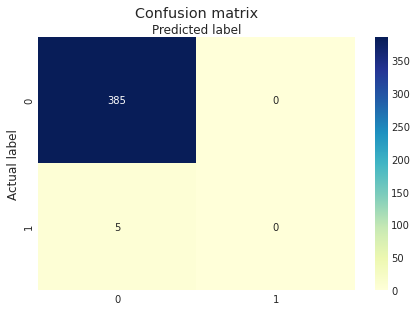

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted', zero_division= 1))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted', zero_division= 1))


Accuracy: 0.9871794871794872
Precision: 0.9873438527284683
Recall: 0.9871794871794872


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       385
           1       0.00      0.00      0.00         5

    accuracy                           0.99       390
   macro avg       0.49      0.50      0.50       390
weighted avg       0.97      0.99      0.98       390



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model = sm.GLM.from_formula("CANCELLED ~ MONTH+DAY_OF_WEEK+FLIGHT_NUMBER+DESTINATION_AIRPORT+SCHEDULED_DEPARTURE+SCHEDULED_TIME+DISTANCE", family=sm.families.Binomial(), data=flights)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              CANCELLED   No. Observations:                 1560
Model:                            GLM   Df Residuals:                     1552
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -179.66
Date:                Fri, 04 Dec 2020   Deviance:                       359.32
Time:                        02:16:40   Pearson chi2:                 1.68e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -3.0211      1.088     -2.777      0.005      -5.153      -0.889
MONTH                  -0.1324      0.050     -2.625      0.009      -0.231      -0.034
DAY_OF_WEEK             0.1303      0.082      1.590      0.112      -0.030       0.291
FLIGHT_NUMBER          -0.0003      0.000     -1.498      0.134      -0.001       0.000
DESTINATION_AIRPORT  2.313e-05      0.009      0.002      0.998      -0.018       0.019
SCHEDULED_DEPARTURE    -0.0001      0.000     -0.352      0.725      -0.001       0.001
SCHEDULED_TIME          0.0032      0.014      0.225      0.822      -0.025       0.031
DISTANCE               -0.0003      0.002     -0.159      0.874      -0.004       0.003
=======================================================================================
"""